# Analyzing racial disparities in SF traffic stops

To start getting our hands dirty with learning data science, we're going to explore San Francisco's traffic stops. Our goals today are twofold:
1. To learn how to use data science to test for racial discrimination, and to investigate whether there is racial discrimination in our SF data. 
2. To learn a bit of `R`, so that tomorrow you can all start doing your own analysis on different datasets!

## Getting started 

First, let's load the necessary libraries and data that will allow us to begin our investigation!

In [29]:
# Some initial setup
options(digits = 3)
library(ggplot2)
library(dplyr)
library(readr)
library(magrittr)
library(lubridate)
library(tidyr)
theme_set(theme_bw())
getwd()

# Read the data
stops <- read_rds("opp_data/san_francisco_stop_data.rds")
pop_2015 <- read_rds("opp_data/sf_pop_2015.rds")

Warning message:
“package ‘tidyr’ was built under R version 3.5.2”

Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract




[1] "/Users/JoshGrossman/dsw2/day-1-exercises"

### Covering the basics

The core of `R` is the dataframe. We've given you one to start with, in the form
of `stops`. Think of dataframes like a spreadsheet: they have rows and columns.
Usually, rows are a "datapoint": in `stops`, each row corresponds to a single
stop from San Francisco. The columns are the "variables": again, in `stops`,
these are the things we know about the stop, like where the stop happened, the
age of the driver, whether an arrest was made, and so on.

We can take a peak simply by typing `stops` into an R chunk:

In [2]:
stops

date,time,location,lat,lng,district,age,race,gender,arrested,contraband_found,searched,reason_for_stop
<date>,<time>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<fct>,<lgl>,<lgl>,<lgl>,<chr>
2009-01-01,10:10:00,1736 PALOU,37.7,-122,C,22,black,female,FALSE,FALSE,TRUE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:15:00,THRIFT/PLYMTH,37.7,-122,I,44,black,male,FALSE,NA,FALSE,Moving Violation
2009-01-01,10:20:00,FLORIDA/19TH,37.8,-122,D,45,white,female,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:20:00,19TH AVE/MORAGAE,37.8,-122,I,27,white,male,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:36:00,19TH/LINCOLN,37.8,-122,I,29,white,male,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:40:00,16TH&JULIAN,37.8,-122,D,34,black,male,FALSE,NA,FALSE,Moving Violation
2009-01-01,10:40:00,LAKE ST & 12TH AVE,37.8,-122,G,50,white,female,FALSE,NA,FALSE,Moving Violation
2009-01-01,10:44:00,19TH/SANTIAGO,37.7,-122,I,29,white,female,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:45:00,19TH AVE & TARAVAL ST,37.7,-122,I,44,white,female,FALSE,NA,FALSE,Moving Violation


### Functions

In math, functions are a way to "do something" to an input. So `f(a)=b` takes a number `a`, and applies `f()`, and gets the output `b`. In programming, we also have functions! Most of the functions we'll use allow us to manipulate our dataframe as the input. 

So if we want to find the number of rows in our dataframe, we'd use the function `nrow()`, which takes a dataframe (like `stops`) as an input, and then outputs an integer (the number of rows in `stops`).

In [3]:
nrow(stops)

[1] 636161

### Your turn

To find the number of columns, we (unsurprisingly) use `ncol`. Try it!

In [4]:
# Find the number of columns in `stops`
# START
ncol(stops)
# END

[1] 13

To figure out what the names of our columns are, we can use `colnames()`.

In [5]:
# Find the column names in `stops`
# START
colnames(stops)
# END

[1] "date"             "time"             "location"         "lat"             
 [5] "lng"              "district"         "age"              "race"            
 [9] "gender"           "arrested"         "contraband_found" "searched"        
[13] "reason_for_stop"

Now, if we want to take a peak at our dataframe without printing the whole 900,000 x 13 table, we can use the functions `head()` or `tail()` to see the first few or last few rows.

In [6]:
head(stops)

date,time,location,lat,lng,district,age,race,gender,arrested,contraband_found,searched,reason_for_stop
<date>,<time>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<fct>,<lgl>,<lgl>,<lgl>,<chr>
2009-01-01,10:10:00,1736 PALOU,37.7,-122,C,22,black,female,FALSE,FALSE,TRUE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:15:00,THRIFT/PLYMTH,37.7,-122,I,44,black,male,FALSE,NA,FALSE,Moving Violation
2009-01-01,10:20:00,FLORIDA/19TH,37.8,-122,D,45,white,female,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:20:00,19TH AVE/MORAGAE,37.8,-122,I,27,white,male,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:36:00,19TH/LINCOLN,37.8,-122,I,29,white,male,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.)
2009-01-01,10:40:00,16TH&JULIAN,37.8,-122,D,34,black,male,FALSE,NA,FALSE,Moving Violation


**Pro-tip:** If you're ever confused about a function and want to know more about it, what it does, how to use it, etc., every function has "documentation" to help! To know more about the `head()` function, simply run a code chunk with `?head`. It provides way more information than you might want or need -- but if you scroll down to the "Examples" section, those usually help!

## Exercise 1: Stop dates

For this first exercise, let's get a better sense of what time range our `stops` data covers. To do this, we'll be dealing with the `date` column in our dataframe. 

1. What happens when you run `stops$date`? How about `pull(stops, date)`? What do `$` and `pull()` do?

2. What date range does our dataset cover? (Hint: Try exploring the `min()` and `max()` functions, or the `range()` function!)

In [7]:
## EXERCISE 1: YOUR CODE HERE
# START
# 1. 
# We get a list of the date each stop occurred on. 
# Both methods ($ and pull) do the same thing, they
# extract the column `date` from the df.

# 2. 
range(stops$date)
# END

[1] "2009-01-01" "2016-06-30"

Take a look at the two versions of the code below. They do the same thing. See if you can understand what's going on in the second one -- what does `%>%` seem to be doing?

In [8]:
# Confirm that these give the same answer:

# Method 1: nested
range(pull(stops, date))

# Method 2: multi-line
stops %>% 
    pull(date) %>% 
    range()


[1] "2009-01-01" "2016-06-30"

[1] "2009-01-01" "2016-06-30"

**tidyverse tip**: The second method uses a funky symbol, `%>%` called the "pipe", which is the crux of the tidyverse. The pipe helps to keep our code clean. It allows us to read top-down rather than inside-out (which is what method 1 above requires of us). Each line simply applies to the result of the previous line:
* We start with `stops`,
* then we apply `pull(date)` to the above (stops), getting us a list of dates,
* then we apply `range()` to the above (a list of dates).

More formally, the pipe operator
just places the previous item into the first argument of the function. So,
`x %>% f()` is simply `f(x)`. While in a one-function call the pipe might feel
silly and unnecessary, it's going to become _really_ helpful once we start
wanting to do multiple transformations to our data. 

## Preparing our data

For some of our analysis, we'll want to focus on the most recent full year: 2015.

To do this we'll want to use the _year_ of each stop, but _year_ isn't currently a column in our dataset. Let's add it!

**tidyverse function: `mutate()`**

We can use the `mutate()` function to fix add a `yr` column to `stops`.
The `mutate()` function adds new columns to a dataframe based on old columns.
The basic setup is `mutate(DATA, NEW_COL = FUN(OLD_COL))` where 
* `DATA` is our
dataframe, 
* `NEW_COL` is the name of the new column we want, and 
* `FUN` is the function we apply to the old column, `OLD_COL`, to get it.

### You try!

In the space below:

1. use the `year()` and `mutate()` functions to add a new column called `yr` to our `stops` dataframe, and
2. use the assignment operator `<-` (it's like = in `R`) to create a new variable, `stops_w_yr`.

In [9]:
# Add a yr column to `stops`
# START
stops_w_yr <- stops %>% mutate(yr = year(date))
# END

**Note:** When we write code chunks and _don't_ save our result using `<-`, that result does not overwrite or in any way change the data. To change the data, we need to use the process above, creating a new variable, or we could overwrite the original dataframe (`stops <- stops %>% ...` -- but be careful, because you could accidentally overwrite the dataframe with something you didn't expect!)

Now, we can investigate this new `yr` column in a few ways. 
1. We can check it's acutally there by looking at `colnames(stops_w_yr)`.
2. We can compute the range of years using `range(stops_w_yr$yr)`.
3. We can count the number of stops per year: `stops_w_yr %>% count(yr)`. 

### You try

Play around with these! Make sure to try the last one.

In [10]:
# Investigate your new `yr` column. 
# Make sure to try counting the number of stops per year!
# START
stops_w_yr %>%
    count(yr)
# END

yr,n
<dbl>,<int>
2009,110269
2010,104254
2011,99476
2012,82362
2013,74144
2014,39752
2015,85689
2016,40215


### Discuss

What do you notice about stop counts over the years?

### Back to data prep

Now let's get back to prepping our data. To get to our desired date range of the most recent full year (2015), we will 
1. Use the `filter()` function to specify the years we want, and 
2. Again use the assignment operator `<-` (it's like = in `R`) to create a new variable, `stops_2015`.

**tidyverse function: `filter()`**

* The `filter()` function is used to separate rows from the dataframe that
interest us from rows that do not. 
* In particular, `filter(DATA, CONDITION)`
returns `DATA` with all of the rows that satisfy `CONDITION` removed. 
* For
instance, we might want to only look at stops from 2015. To do this, we would type `stops %>% filter(yr == 2015)`, since we only want
rows from `stops` where the `yr` column is (i.e., `==`) `2015`. 
* We can also filter on multiple conditions, just separating each condition with a comma. So, for example, if we wanted all stops between 2011 and 2015, we would write `stops %>% filter(yr >= 2011, yr <=2015)`.

### Your turn

Create a new variable, `stops_2015` that is our stops dataframe filtered to just those that happened in the year (`yr`) 2015. 

In [11]:
# Use the filter function to get just stops from 2015
# START
stops_2015 <- 
    stops_w_yr %>%
    filter(yr == 2015)
# END

Just to be extra sure, let's check our date range in this new dataframe, `stops_2015`!

In [12]:
# What date range does stops_2015 cover?
# START
stops_2015$date %>% range()
# END

[1] "2015-01-01" "2015-12-31"

## Exercise 2: Stops by race group

For this second exercise, let's compute the racial breakdown of traffic stops. To do this, we'll need two functions that we've already seen: `count()` and `mutate()`.

1. Count how many stops per race group our `stops_2015` dataset has, saving your result to a new dataframe: `stops_by_race`. 

2. Describe in words what we'd need to do to find the proportion of stops that were of white drivers.

3. To do the above computation for each race group, we can add additional column to `stops_by_race` using the `mutate()` function. Overwrite `stops_by_race`, adding a new column `p` with the proportion of stops that were made of drivers of each race group.

4. Discuss: What do these proportions mean? Are drivers of certain race groups being stopped more than others? What might we be missing to really start interpreting these values?

In [13]:
# EXERCISE 2: YOUR CODE HERE
# START
# 1. 
stops_by_race <- stops_2015 %>% count(race)
# 2.
# Divide each count (num stops by race) by the total (num overall stops)
# 3. 
stops_by_race <- stops_by_race %>% mutate(p = n / sum(n))
# 4. 
stops_by_race
# This means 35% of stops were of white drivers, 18% of black drivers
# 18% Aisan, 14% Hispanic, etc. 
# It seems like the biggest race group being stopped are white drivers.
# But, i know that SF has a pretty large white population -- probably
# more than 35% of SF is white...so maybe they're actually 
# underrepresented in stops? We'd need to know the population to be 
# able to answer this question of whether some race groups are being 
# stopped disproportionately.
# We see white drivers make up about one-third of stops, and drivers 
# of each other race represent 14-18%. The by-race stop counts are 
# only meaningful, though, when compared to some baseline. If the 
# San Francisco population was about one-third white, one-third 
# percent of stops being of white drivers wouldn't be at all 
# surprising. But if 75% of the SF population is white, then our 
# findings might be more suspicious!
# END

race,n,p
<chr>,<int>,<dbl>
asian/pacific islander,15498,0.181
black,14955,0.175
hispanic,11911,0.139
other,13560,0.158
white,29765,0.347


## Stop rates

In order to do this baseline comparison, we need to understand the racial
demographics in our SF population data. (Note: This is why we wanted just one full year: comparing the number of stops in a year to the population from that year.) The data as we've given it to you
has raw population numbers from 2015. To make it useful, we'll need to compute the
_proportion_ of SF residents in each demographic group. As before, we do this using the `mutate()` function.

### You try

* Take a look at `pop_2015`, then
* mutate `pop_2015`, adding a column `p` that shows us what proportion of the population is white, black, Hispanic, Asian, and other.

In [14]:
# Find the racial breakdown of SF's 2015 population
# START
pop_2015 %>%
    mutate(p = n_people / (sum(n_people)))
# END

race,n_people,p
<chr>,<dbl>,<dbl>
white,346732,0.4124
black,44879,0.0534
hispanic,128619,0.1530
asian/pacific islander,285266,0.3393
other,35267,0.0419


### Discuss

What do the population proportions tell you about the stop proportions we computed before?


### Adding rigor

We can tell a lot just by eyeballing these two sets of proportions. But let's be a bit more
rigorous about this. If we merge the two tables together, we can compute stop 
rates by race group (i.e., number of stops per person). 

**R function: `merge()`**

One way to put tables together is with the `merge()` function. We need to
input three things into this function: 
 1. our main table
 2. the second table we'd like to merge with the first table, and
 3. instructions on how to merge them. 

In this case, the two tables we
want to merge are 
 1. the table of stops counted according to `race`, and
 2. the table of population by race: `pop_2015`. 
 
The instruction for combining the tables is 
 3. to merge rows that give information about the same race groups.

To implement 3., we give `merge()` the argument `by =
"race"`. This means that `merge()` will 
 * look at the first table---
i.e., the table stops counted by race---and go to the `race` column
in each row.
 * Then, `merge()` will take what it finds there---in this case,
`"asian/pacific islander"`, `"black"`, `"hispanic"`, `"other/unknown"`, and
`"white"`---and look in the second table, i.e., `pop_2015`, for all the
rows that contain the same information in `pop_2015`'s race column.
 * Finally,
it will add the second row at the end of the first to create a new row with
information from both. 

What we end up with is a dataframe with all of the
columns from _both_ tables.

The process is a little complicated, and we won't use it too much, so don't
worry if the abstract description doesn't make sense. To get a better
understanding of what's going on, try merging the two tables described above,
being sure to include the `by = "race"` argument.


## Exercise 3: computing stop rates by race group

1. First, merge together `stops_by_race` and `pop_2015` by "race", using the `merge()` function. Name your result `stops_and_pop_by_race`.
2. Add a column `stop_rate` to `stops_and_pop_by_race`, that is simply the number of stops divided by the number of people. (Hint: the `mutate()` function will be helpful!)
3. Now we can divide the black (or Asian, or Hispanic, or "other") stop rate by the white stop rate to be able to make 
a quantitative statement about how much more often black drivers are stopped compared to white drivers, relative to their share of the city's population. Using `R` as a calculator, do this!
4. Discuss your results.

In [15]:
# EXERCISE 3: YOUR CODE HERE
# START
# 1.
stops_and_pop_by_race <- 
    merge(
        stops_by_race,
        pop_2015, 
        by = "race"
    )
# 2. 
stop_rates <- 
    stops_and_pop_by_race %>%
    mutate(stop_rate = n / n_people)
# 3. 
stop_rates
# black-white stop rate ratio:
print(0.3332/0.0858)
# Hispanic-white stop rate ratio:
print(0.0926/0.0858)
# Asian-white stop rate ratio:
print(0.0543/0.0858)
# other-white stop rate ratio:
print(0.3845/0.0858)
# END

race,n,p,n_people,stop_rate
<chr>,<int>,<dbl>,<dbl>,<dbl>
asian/pacific islander,15498,0.181,285266,0.0543
black,14955,0.175,44879,0.3332
hispanic,11911,0.139,128619,0.0926
other,13560,0.158,35267,0.3845
white,29765,0.347,346732,0.0858


[1] 3.88
[1] 1.08
[1] 0.633
[1] 4.48


### Thought exercise: where stop rates fall short

While these baseline stats give us a sense that there are racial disparities in
policing practices in SF, they are not strong evidence of discrimination. The
argument against using stop rates (often called "benchmarking" or the "benchmark test") is that we haven't identified the correct
baseline to compare to. 
* Why isn't population the best thing to compare to (i.e., the best denominator of our stop rate)?
* What would the ideal denominator of our stop rate be?
* What other baselines (denominators) could we use? Are any of these ideal?

In [16]:
# Your thoughts here (or just discuss)
# START
# For the stop rate denominator, what we really want to know is what 
# the true distribution is for individuals breaking traffic laws or 
# exhibiting other criminal behavior in their vehicles. But using 
# SF residential population doesn't account for commuting 
# populations, or possible race-specific differences in driving 
# behavior,including amount of time spent on the road (and 
# adherence to traffic laws, as mentioned above).  If black 
# drivers, hypothetically, spend more time on the road than white 
# drivers, that in and of itself could explain the higher stop
# rates we see for black drivers, even in the absence of 
# discrimination.
# We could try using violation rates as a baseline, but those can 
# be racially skewed by the vary systems we're trying to evaluate! 
# We can try something that's less racially skewed, like violent
# crime rates, but violent crime rates have very little to do with
# traffic infractions! We really don't have any ideal baseline here. 
# END 

## Searches

Let's next consider how often drivers of different race groups were searched. Computing search rates is actually easier than stop rates because we don't need an external population benchmark.
We can use the stopped population as our baseline, defining search rate to be the proportion of stopped people who were subsequently searched. 

**tidyverse functions: `group_by()` and `summarize()`**

One thing that we often want to do with data is disaggregate it. That is, we
might want to take the data and break it down into smaller subpopulations. Then,
when we ask questions, we can ask about each piece---for instance, each
demographic group, or each police district---instead of asking about the population as a whole.

The way to do this in `R` is with `group_by()` and `summarize()`. The standard way
to use `group_by()` is to call `group_by(DATA, COL_NAME)`, where 
* `DATA` is our dataframe and 
* `COL_NAME` is the name of a column. 
What `group_by()` then does is
take all the rows in the dataframe `DATA` and put them into different groups,
one for each different value in the column `COL_NAME`. So, for instance, if we
called `group_by(stops_w_yr, district)`, `R` would hand back to us the `stops_w_yr`
dataframe with all of its columns broken into different groups, one for each
police district. (Note: At this stage, the dataframe doesn't _look_ any different to the human eye, since the groupings are happening behind the scenes.)

Try it below!

In [17]:
stops_w_yr %>%
    group_by(district)

date,time,location,lat,lng,district,age,race,gender,arrested,contraband_found,searched,reason_for_stop,yr
<date>,<time>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<fct>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>
2009-01-01,10:10:00,1736 PALOU,37.7,-122,C,22,black,female,FALSE,FALSE,TRUE,Mechanical or Non-Moving Violation (V.C.),2009
2009-01-01,10:15:00,THRIFT/PLYMTH,37.7,-122,I,44,black,male,FALSE,NA,FALSE,Moving Violation,2009
2009-01-01,10:20:00,FLORIDA/19TH,37.8,-122,D,45,white,female,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.),2009
2009-01-01,10:20:00,19TH AVE/MORAGAE,37.8,-122,I,27,white,male,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.),2009
2009-01-01,10:36:00,19TH/LINCOLN,37.8,-122,I,29,white,male,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.),2009
2009-01-01,10:40:00,16TH&JULIAN,37.8,-122,D,34,black,male,FALSE,NA,FALSE,Moving Violation,2009
2009-01-01,10:40:00,LAKE ST & 12TH AVE,37.8,-122,G,50,white,female,FALSE,NA,FALSE,Moving Violation,2009
2009-01-01,10:44:00,19TH/SANTIAGO,37.7,-122,I,29,white,female,FALSE,NA,FALSE,Mechanical or Non-Moving Violation (V.C.),2009
2009-01-01,10:45:00,19TH AVE & TARAVAL ST,37.7,-122,I,44,white,female,FALSE,NA,FALSE,Moving Violation,2009


The second step is to do something with those groups. That's what `summarize()`
does. The way `summarize()` works is to take a dataframe broken into groups by
`group_by()` and calculate a statistic for each group. The basic syntax is
`summarize(DATA, STAT = FUN(COL_NAME))`, where 
* `DATA` is some dataframe broken
up by `group_by()`, 
* `STAT` is some statistic we want to calculate, 
* `FUN` is the
function that calculates that statistic, and 
* `COL_NAME` is the name of the
column (or columns) used to calculate the statistic.

Let's put it all together with a simple example first.

In [18]:
# Consider the following dataframe (a "tibble" is just a dataframe)
d <- tibble(
    name = c("Heaven", "Jesus", "Grace", "Maria", "Juan", "Tram"), 
    gender = c("f", "m", "f", "f", "m", "f"), 
    color = rep(c("green", "blue"), 3),
    food = c(rep("apple", 3), rep("banana",3)),
    n_items = c(4,10,12,14,7,5)
)
d

name,gender,color,food,n_items
<chr>,<chr>,<chr>,<chr>,<dbl>
Heaven,f,green,apple,4
Jesus,m,blue,apple,10
Grace,f,green,apple,12
Maria,f,blue,banana,14
Juan,m,green,banana,7
Tram,f,blue,banana,5


In [19]:
# If we want to figure out how many foods the girls have and how
# many foods the boys have, we can `group_by` gender and then 
# `summarize` by summing the number of items.
d %>%
    group_by(gender) %>%
    summarize(total_items = sum(n_items))

gender,total_items
<chr>,<dbl>
f,35
m,17


In [20]:
# We can also compute the _average_ number of items, the same way!
d %>%
    group_by(gender) %>%
    summarize(
        total_items = sum(n_items),
        avg_items = mean(n_items)
    )

gender,total_items,avg_items
<chr>,<dbl>,<dbl>
f,35,8.75
m,17,8.50


In [21]:
# We can use the function `n()` to tell us how many instances
# exist in each group (i.e., how many boys and how many girls we have)
# This is another way we could compute the average ourselves!
d %>%
    group_by(gender) %>%
    summarize(
        total_items = sum(n_items),
        num_people = n(),
        avg_items = total_items / num_people
    )


gender,total_items,num_people,avg_items
<chr>,<dbl>,<int>,<dbl>
f,35,4,8.75
m,17,2,8.50


Make sense? Now, using `group_by()` and `summarize()`, we'll calculate search rates by race group.

## Exercise 4: Search rates

1. Compute search rates by race group. (Hint: Think about what information you'd need to compute a search rate. The `n()` function might be helpful!)
2. Discuss the search rate findings. Are some race groups searched more often than other race groups, relative to their share of stopped drivers?

NOTE: Since we're not comparing to population numbers, we can return to using our full `stops_w_yr` dataset, with all years!

In [22]:
# YOUR CODE HERE
# START
#Search rates, METHOD 1
stops_w_yr %>%
    group_by(race) %>%
    summarize(
        n_searched = sum(searched),
        n_stopped = n(),
        search_rate = n_searched / n_stopped
    )
# Search rates, METHOD 2
# This way is a bit tricky! It relies on the fact that booleans
# (i.e., TRUE and FALSE) can be coerced into integers (1 and 0),
# so `mean(searched)` takes the number of TRUEs divided by the
# number of rows in each race group, which is exactly what METHOD 1
# does, manually.
stops_w_yr %>%
    group_by(race) %>%
    summarize(
        search_rate = mean(searched)
    )
# END

race,n_searched,n_stopped,search_rate
<chr>,<int>,<int>,<dbl>
asian/pacific islander,1867,110931,0.0168
black,16909,106143,0.1593
hispanic,7451,82979,0.0898
other,2436,76569,0.0318
white,7569,259539,0.0292


race,search_rate
<chr>,<dbl>
asian/pacific islander,0.0168
black,0.1593
hispanic,0.0898
other,0.0318
white,0.0292


## Thought exercise: where search rates fall short
* Do search rates have similar issues as we found with stop rates? Why or why not?
* What might "justifiably" lead search rates to differ by race group?

In [23]:
# Write your thoughts here (or just discuss)!
# START
# Search rates are slightly less suspect than stop rates, 
# since among the stopped population, it's more reasonable to 
# believe that people of different races offend at equal rates. 
# In the context of searches, this means assuming that all race groups 
# exhibit probable cause of possessing contraband at equal rates. 
# One could claim that the stopped population isn't a good 
# measure of the true racial distribution of probable cause. 
# This is all to say that while benchmark stats (stop rates, 
# search rates) are a good place to start, more investigation is 
# required before we can draw any strong conclusions.
# END

## Outcome test

To circumvent the benchmarking problem, it's common to turn to the search 
decision, rather than the stop decision. This is because we have a notion of
what a "successful" search is. The legal justification for performing a search
is probable cause that the driver possesses contraband. So a successful search
is one which uncovers contraband.

We thus turn to rates of successful searches. That is, what proportion of
searches, by race, were successful? This proportion is known as the contraband
recovery rate, or the "hit rate." If racial groups have different hit rates, it
can imply that racial groups are being subjected to different standards.

## Thought Exercise: Hit rate interpretation

As a caricatured example, suppose among white drivers who were searched, 
officers found contraband 99% of the time, while among black drivers who were
searched, officers found contraband only 1% of the time. 
* Is this police department's search policy discriminatory? 
* Why or why not?
* In general how can we use hit rates to understand whether a search policy is discriminatory?

In [24]:
# Write your thoughts here (or just discuss)!
# START
# These hit rates would lead us to
# believe that officers made sure they were _certain_ 
# white individuals had contraband before deciding to 
# search, but that they were searching black 
# individuals on a whiff of evidence.
# In general, lower hit rates are a sign a group is being
# discriminated against.
# END


Next let's investigate a non-caricatured case: real hit rates by race group in SF.

## Exercise 5: Hit rates

1. Filter to drivers who were searched, and then compute the hit rate (rate of contraband recovery) by race group. Remember your `group_by()` and `summarize()` functions!

2. Discuss your findings. 

In [25]:
# YOUR CODE HERE
# START
# 1.
stops_w_yr %>%
    filter(searched) %>%
    group_by(race) %>%
    summarize(hit_rate = mean(contraband_found))
# 2.
# Looks like the black and Hispanic hit rates are _much_
# lower than the white hit rate -- this is a sign that
# black and Hispanic drivers are probably being discriminated
# against at the search decision.
# END

race,hit_rate
<chr>,<dbl>
asian/pacific islander,0.3230
black,0.0872
hispanic,0.0996
other,0.1876
white,0.2349


What if hit rates vary by police district? If the bar for stopping
people, irrespective of race, is lower in certain police districts, and black
individuals are more likely to live in neighborhoods in those districts, then
the observed disparities may not reflect bias.

Let's compute hit rates by race _and_ district. We can do this simply by adding multiple arguments to the `group_by()` function. Run the code below.

In [26]:
hit_rates <- 
  stops_w_yr %>% 
  filter(searched) %>% 
  group_by(race, district) %>% 
  summarize(hit_rate = mean(contraband_found))

hit_rates %>% nrow()

[1] 50

This is too many hit rates to compare in one table!

## Exercise 6: Visualization brainstorm

Sketch out using pen and paper how you might try to use visualizations to help us synthesize the 50 hit rates above. Start with the question we're trying to answer (Are hit rates for minority drivers lower than hit rates for white drivers?) -- and then think about what type of plot might best help you answer that question. See if you can come up with at least 3 different sketches!

## One way to visualize: scatterplots

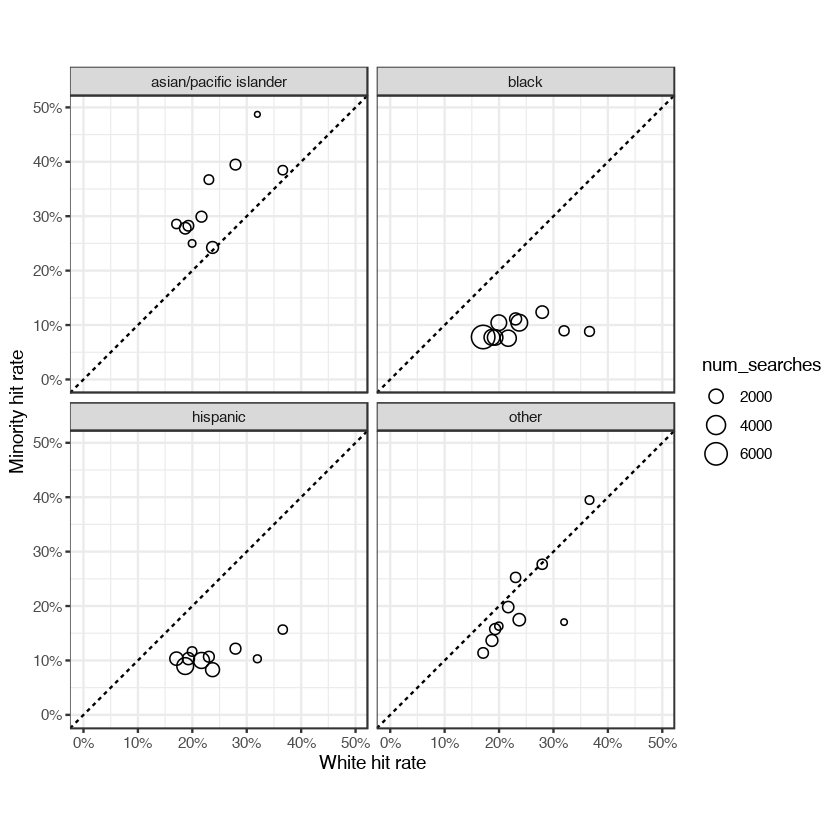

In [30]:
# Reshape table to show hit rates of minorities vs white drivers
reshaped_hit_rates <-
  hit_rates %>% 
  spread(race, hit_rate, fill = 0) %>% 
  rename(white_hit_rate = white) %>% 
  gather(
      minority_race, minority_hit_rate, 
      c(black, hispanic, `asian/pacific islander`, other)
  ) %>%
  arrange(district)

# We'll use this just to make our axes' limits nice and even
max_hit_rate <-
  reshaped_hit_rates %>% 
  select(ends_with("hit_rate")) %>% 
  max()

# Get corresponding number of searches (to size points).
# Again, for each district we want to know the number of white+black searches
# and white+Hispanic searches. This requires the same spreading and gathering
# as our previous data-munging.
search_counts <-
  stops_w_yr %>% 
  filter(searched) %>%  
  count(district, race) %>% 
  spread(race, n, fill = 0) %>% 
  rename(num_white_searches = white) %>% 
  gather(
      minority_race, num_minority_searches, 
      c(black, hispanic, `asian/pacific islander`, other)
  ) %>% 
  mutate(num_searches = num_minority_searches + num_white_searches) %>% 
  select(district, minority_race, num_searches)

# Now let's plot!
reshaped_hit_rates %>% 
  left_join(
    search_counts, 
    by = c("district", "minority_race")
  ) %>% 
  ggplot(aes(
    x = white_hit_rate,
    y = minority_hit_rate
  )) +
  geom_point(aes(size = num_searches), pch = 21) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  scale_x_continuous("White hit rate", 
    limits = c(0, max_hit_rate + 0.01),
    labels = scales::percent_format(accuracy = 1)
  ) +
  scale_y_continuous("Minority hit rate", 
    limits = c(0, max_hit_rate + 0.01),
    labels = scales::percent_format(accuracy = 1)
  ) +
  coord_fixed() +
  facet_wrap(vars(minority_race))

## Exercise 7: Plot interpretation

Explain what you see above. What does each point represent? What does the dotted line represent? What do these plots tell us about discrimination in search practices?